In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import arap_helpers
from arap_helpers import QueryTable, AlternateProducts, get_prod_catalog, get_subcategory 

project_id = "cp-gaa-visualization-dev"

### ALternate Purchase: Hill's

In [4]:
hills_qry = QueryTable(sql_query)

In [5]:
hills_df = hills_qry.query_table()

Downloading: 100%|██████████| 29020/29020 [00:04<00:00, 6406.78rows/s]


In [6]:
prod_catalog = get_prod_catalog(hills_df)
hills_alt_purchase = get_subcategory(hills_df, keyword="Hill's")

There are 706 unique products


In [7]:
alt_p = AlternateProducts(hills_alt_purchase, prod_catalog, 'n1_purchased_product_title', brand="Hill's", keyword = "Hill's")

In [8]:
hills_1 = alt_p.flag_alt_hills_products()

In [9]:
hills_1.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute
0,2018-09-30,B002Z9JJBA,Hill's Science Diet Wet Cat Food Adult Indoor ...,Fitbit Charge 3 Fitness Activity Tracker Rose ...,no,no
1,2018-09-30,B003NWKMB4,Hill's Science Diet Dry Dog Food Adult Lamb Me...,Hill's Science Diet Dry Dog Food Adult Lamb Me...,yes,no
2,2018-09-30,B002Z9EQMC,Hill's Science Diet Wet Cat Food Adult Minced ...,Hill's Science Diet Wet Cat Food Adult Minced ...,yes,no
3,2018-09-30,B0002TJAYG,Hill's Science Diet Wet Cat Food Adult Minced ...,Hill's Science Diet Wet Cat Food Adult Tender ...,yes,no
4,2018-09-30,B0033YYG46,Hill's Science Diet Wet Dog Food Adult 13 oz C...,Hill's Science Diet Wet Dog Food Adult 13 oz C...,yes,no


In [10]:
alt_p = AlternateProducts(hills_alt_purchase, prod_catalog, 'n2_purchased_product_title', brand="Hill's", keyword = "Hill's")

In [11]:
hills_2 = alt_p.flag_alt_hills_products()

In [12]:
alt_p = AlternateProducts(hills_alt_purchase, prod_catalog, 'n3_purchased_product_title', brand="Hill's", keyword = "Hill's")

In [13]:
hills_3 = alt_p.flag_alt_hills_products()

In [14]:
hills_3.head()

,start_date,asin,product_title,n3_purchased_product_title,n3_internal,n3_substitute
0,2018-09-30,B002Z9JJBA,Hill's Science Diet Wet Cat Food Adult Indoor ...,Hill's Science Diet Wet Cat Food Adult Chunks ...,yes,no
1,2018-09-30,B003NWKMB4,Hill's Science Diet Dry Dog Food Adult Lamb Me...,Nature's Recipe Lamb Rice & Barley Recipe Stew...,no,yes
2,2018-09-30,B002Z9EQMC,Hill's Science Diet Wet Cat Food Adult Minced ...,Hill's Science Diet Wet Cat Food Adult Indoor ...,yes,no
3,2018-09-30,B0002TJAYG,Hill's Science Diet Wet Cat Food Adult Minced ...,Hill's Science Diet Wet Cat Food Adult Minced ...,yes,no
4,2018-09-30,B0033YYG46,Hill's Science Diet Wet Dog Food Adult 13 oz C...,Hill's Science Diet Wet Dog Food Adult 7+ for ...,yes,no


In [20]:
print("An Example of a switch from an internal product into a substitute:\n")
print(f'From ==> {hills_3.product_title[1]}')
print('\n')
print(f'Into ==> {hills_3.n3_purchased_product_title[1]}')

An Example of a switch from an internal product into a substitute:

From ==> Hill's Science Diet Dry Dog Food Adult Lamb Meal & Brown Rice Recipe 15.5 lb Bag


Into ==> Nature's Recipe Lamb Rice & Barley Recipe Stew Wet Dog Food 13.2 Ounces (Pack of 12) Easy to Digest


In [21]:
hills_merged = alt_p.merge_table(hills_1, hills_2, hills_3)
hills_merged.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,n2_purchased_product_title,n2_internal,n2_substitute,n3_purchased_product_title,n3_internal,n3_substitute
0,2018-09-30,B002Z9JJBA,Hill's Science Diet Wet Cat Food Adult Indoor ...,Fitbit Charge 3 Fitness Activity Tracker Rose ...,no,no,Hill's Science Diet Wet Cat Food Adult Tender ...,yes,no,Hill's Science Diet Wet Cat Food Adult Chunks ...,yes,no
1,2018-09-30,B003NWKMB4,Hill's Science Diet Dry Dog Food Adult Lamb Me...,Hill's Science Diet Dry Dog Food Adult Lamb Me...,yes,no,Hill's Science Diet Dry Dog Food Adult Small B...,yes,no,Nature's Recipe Lamb Rice & Barley Recipe Stew...,no,yes
2,2018-09-30,B002Z9EQMC,Hill's Science Diet Wet Cat Food Adult Minced ...,Hill's Science Diet Wet Cat Food Adult Minced ...,yes,no,Hill's Science Diet Wet Cat Food Adult Tender ...,yes,no,Hill's Science Diet Wet Cat Food Adult Indoor ...,yes,no
3,2018-09-30,B0002TJAYG,Hill's Science Diet Wet Cat Food Adult Minced ...,Hill's Science Diet Wet Cat Food Adult Tender ...,yes,no,Hill's Science Diet Wet Cat Food Adult Chunks ...,yes,no,Hill's Science Diet Wet Cat Food Adult Minced ...,yes,no
4,2018-09-30,B0033YYG46,Hill's Science Diet Wet Dog Food Adult 13 oz C...,Hill's Science Diet Wet Dog Food Adult 13 oz C...,yes,no,Hill's Science Diet Wet Dog Food Adult Savory ...,yes,no,Hill's Science Diet Wet Dog Food Adult 7+ for ...,yes,no


yes    94.978793
no      5.021207
Name: n1_internal, dtype: float64
************

yes    90.783053
no      9.216947
Name: n2_internal, dtype: float64
************

yes    85.802891
no     14.197109
Name: n3_internal, dtype: float64


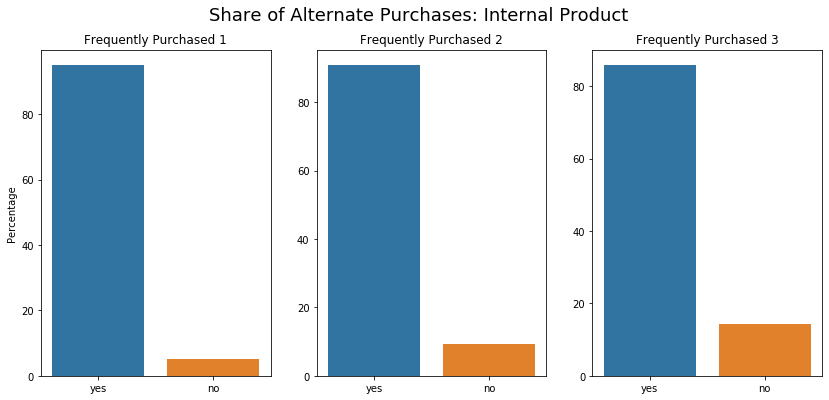

In [22]:
alt_p.show_internal_external_subplot(hills_merged.n1_internal,
                                    hills_merged.n2_internal,
                                    hills_merged.n3_internal)

no     98.83705
yes     1.16295
Name: n1_substitute, dtype: float64
************

no     97.053861
yes     2.946139
Name: n2_substitute, dtype: float64
************

no     93.916176
yes     6.083824
Name: n3_substitute, dtype: float64


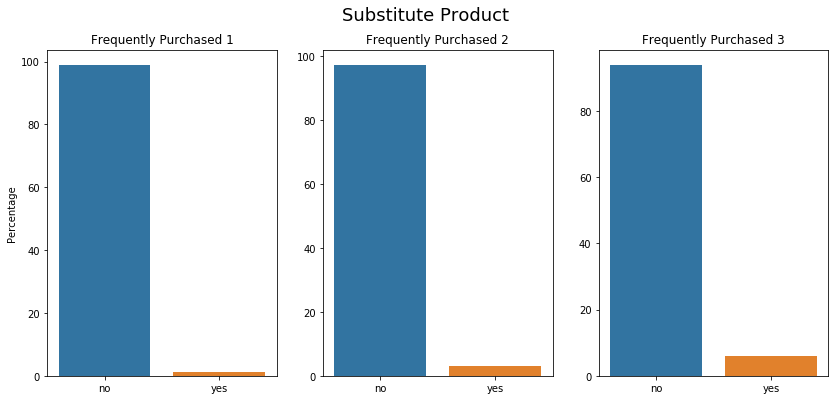

In [23]:
alt_p.show_substitues_subplot(hills_merged.n1_substitute,
                             hills_merged.n2_substitute,
                             hills_merged.n3_substitute)

In [25]:
alt_p.get_alt_product_count(hills_merged)

,n1_purchased_product_title,n1_purchased_product_count
0,Hill's Science Diet Wet Cat Food Adult 7+ for ...,551
1,Hill's Science Diet Dry Dog Food Adult Large B...,444
2,Hill's Science Diet Wet Cat Food Kitten Health...,310
3,Hill's Science Diet Wet Dog Food Adult 13 oz C...,289
4,Hill's Science Diet Dry Dog Food Adult Sensiti...,279
...,...,...
1090,Purina Fancy Feast Grain Free Pate Wet Cat Foo...,1
1091,Fergon High Potency Iron Highly Soluble & Easi...,1
1092,Spilfyter 690321 Hands-In-Bag Polyethylene Atm...,1
1093,Bounty Quick-Size Paper Towels White 8 Family ...,1
